In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA




url = 'https://raw.githubusercontent.com/aniruddha7599/FoML-Project/refs/heads/main/my_dataframe.csv'
data = pd.read_csv(url)

In [2]:
# Display basic info
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,Age,"Gender (Female=0, Male=1)",Height (cm),Weight (kg),Body Mass Index,Waist Circumference (cm),Hip Circumference (cm),"Diabetes (No=0, Yes=1)","Smoking Status(Not Smoking=0, Smoking=1)","Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)"
0,60,0,150,80,35.56,119.0,104.0,0,1,1
1,55,0,154,73,30.78,101.0,98.0,0,0,0
2,53,1,170,101,34.95,116.0,112.0,1,1,1
3,33,1,175,95,31.02,114.0,114.0,1,1,1
4,23,1,162,68,25.91,101.0,97.0,0,1,0


In [3]:
# Define the features and target
X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

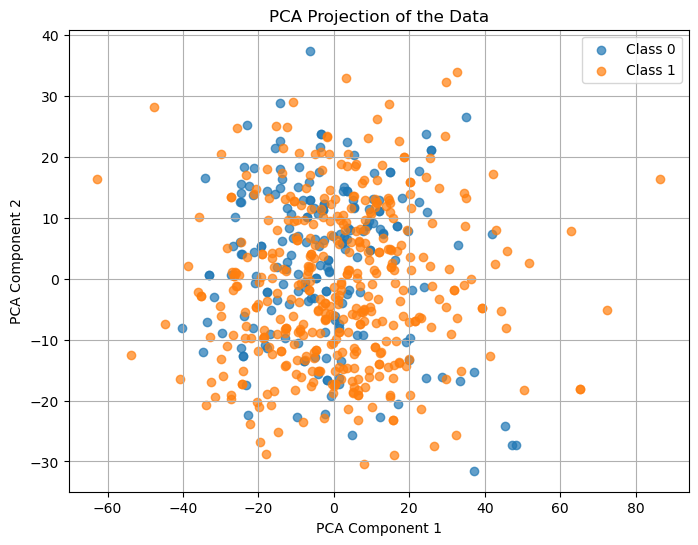

Accuracy with Linear SVM: 0.6813
Accuracy with rbf SVM: 0.6813


In [19]:
# Reduce dimensions using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.figure(figsize=(8, 6))
for label in [0, 1]:
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=f"Class {label}", alpha=0.7)
plt.title("PCA Projection of the Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()


# Train a linear SVM and evaluate accuracy
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
accuracy_linear = svm_linear.score(X_test, y_test)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy with Linear SVM: {accuracy_linear:.4f}")
print(f"Accuracy with rbf SVM: {accuracy_rbf:.4f}")

In [12]:
# Create and train the SVM model with a standard kernel (e.g., RBF)
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [13]:
# Make predictions
y_pred = model.predict(X_test)

In [14]:
model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [15]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [16]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6208791208791209
Precision: 0.7894736842105263
Recall: 0.6048387096774194
F1 Score: 0.684931506849315
Confusion Matrix:
 [[38 20]
 [49 75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.66      0.52        58
           1       0.79      0.60      0.68       124

    accuracy                           0.62       182
   macro avg       0.61      0.63      0.60       182
weighted avg       0.68      0.62      0.63       182



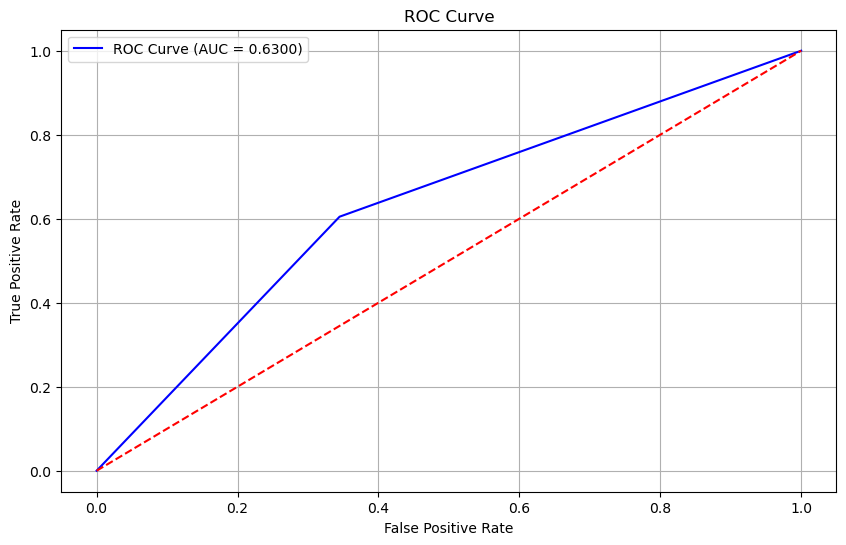

In [17]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

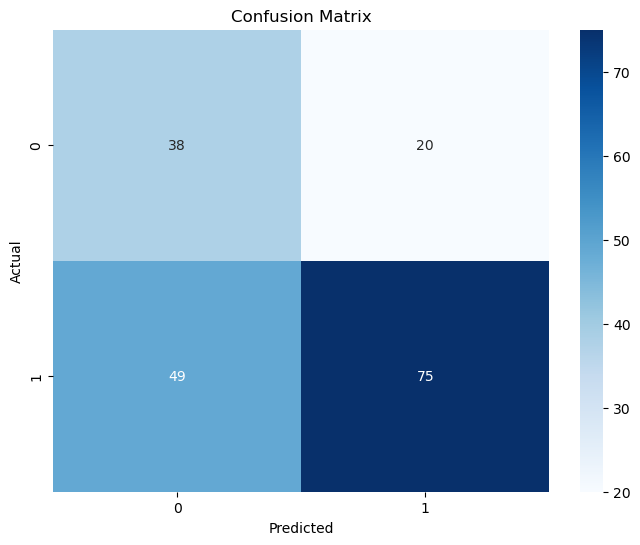

In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()